In [67]:
import pandas as pd 
import numpy as np
import ijson
from urllib2 import urlopen



In [68]:

api_url = 'https://www.quandl.com/api/v1/datasets/WIKI/%s.json' % 'AAPL'
#objects = ijson.items(json, 'columns')
f = urlopen('https://www.quandl.com/api/v1/datasets/WIKI/AAPL.json')
objects = ijson.items(f, 'column_names')
#tmp = objects[0]
tmp = list(objects)[0]
columns = []
for val in tmp:
    columns.append(val)

In [69]:
f = urlopen('https://www.quandl.com/api/v1/datasets/WIKI/AAPL.json')
objects = ijson.items(f, 'data')
tmp = list(objects)[0]
data = []
for val in tmp:
    data.append(val)


In [70]:
data = pd.DataFrame(data, columns=columns)
data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2016-08-19,108.77,109.69,108.36,109.36,24870365,0,1,108.77,109.69,108.36,109.36,24870365
1,2016-08-18,109.23,109.6,109.02,109.08,20502609,0,1,109.23,109.6,109.02,109.08,20502609
2,2016-08-17,109.1,109.37,108.34,109.22,25057327,0,1,109.1,109.37,108.34,109.22,25057327
3,2016-08-16,109.63,110.23,109.21,109.39,33502732,0,1,109.63,110.23,109.21,109.39,33502732
4,2016-08-15,108.14,109.54,108.08,109.51,25346817,0,1,108.14,109.54,108.08,109.51,25346817


In [71]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [72]:
#output_file("test.html")
p = figure()
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)

In [124]:
from bokeh.plotting import output_file

#output_file('test.html')
output_notebook()

Loading BokehJS ...

In [127]:
print(map(float,np.array(list(data['Close']))))

[109.36, 109.08, 109.22, 109.39, 109.51, 108.18, 107.93, 108.0, 108.81, 108.37, 107.48, 105.87, 105.79, 104.48, 106.05, 104.19, 104.34, 102.95, 96.67, 97.34, 98.66, 99.4, 99.96, 99.87, 99.83, 98.78, 98.79, 96.87, 97.42, 96.98, 96.68, 95.94, 95.53, 94.98, 95.89, 95.58, 94.4, 93.59, 92.08, 93.4, 96.1, 95.55, 95.91, 95.1, 95.33, 97.565, 97.14, 97.46, 97.34, 98.83, 99.65, 98.94, 99.03, 98.63, 97.92, 97.72, 98.46, 99.82, 100.35, 100.41, 99.62, 97.9, 96.43, 95.22, 94.2, 94.56, 93.49, 93.88, 90.52, 90.32, 92.51, 93.39, 92.82, 92.72, 93.24, 94.19, 95.18, 93.65, 93.75, 94.8075, 97.82, 104.35, 105.08, 105.68, 105.97, 107.13, 106.91, 107.48, 109.85, 112.1, 112.0192, 110.44, 109.04, 108.66, 108.54, 110.96, 109.81, 111.08, 109.99, 108.99, 109.56, 107.7, 105.19, 105.67, 106.13, 106.72, 105.91, 105.92, 105.8, 105.97, 104.58, 102.52, 102.23, 101.17, 101.12, 101.03, 101.87, 103.01, 101.5, 100.75, 100.53, 96.69, 96.91, 96.76, 96.1, 94.69, 96.8708, 96.04, 96.26, 98.12, 96.555, 93.99, 93.7, 94.27, 94.99, 

In [138]:
#plot = figure(title='Data from Quandle WIKI set',
#              x_axis_label='date',
#              x_axis_type='datetime')

p = figure(title='Data from Quandle WIKI set', x_axis_label='date', x_axis_type='datetime')
#p = figure()

b = map(float,list(data['Close']))
a = range(len(b))
p.line(a,data['Close'],line_width=2)

#p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)
#print data['Close'][:1000]

In [118]:
a = map(int,list(data['Close'][:1]))
print a
p = figure()
p.line([1], [5], line_width=2)
#p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)
print type(a[0])

[109]


<type 'int'>


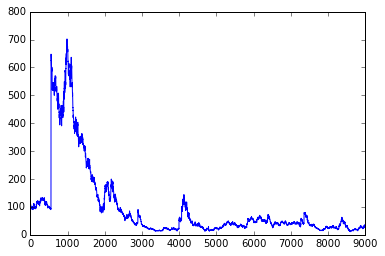

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data['Close'])

In [74]:
from bokeh.embed import components 

script, div = components(plot)
return render_template('graph.html', script=script, div=div)

In [146]:
api_url = 'https://www.quandl.com/api/v1/datasets/WIKI/adfasdf.json'
urlopen(api_url)
tmp = ijson.items(f, 'error')
print tmp

HTTPError: HTTP Error 404: Not Found